# Building of the 3 Machine Learning Models in a one objetctive variable way

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("data.csv")
df = df.sample(frac=0.1)
df.shape

(50676, 55)

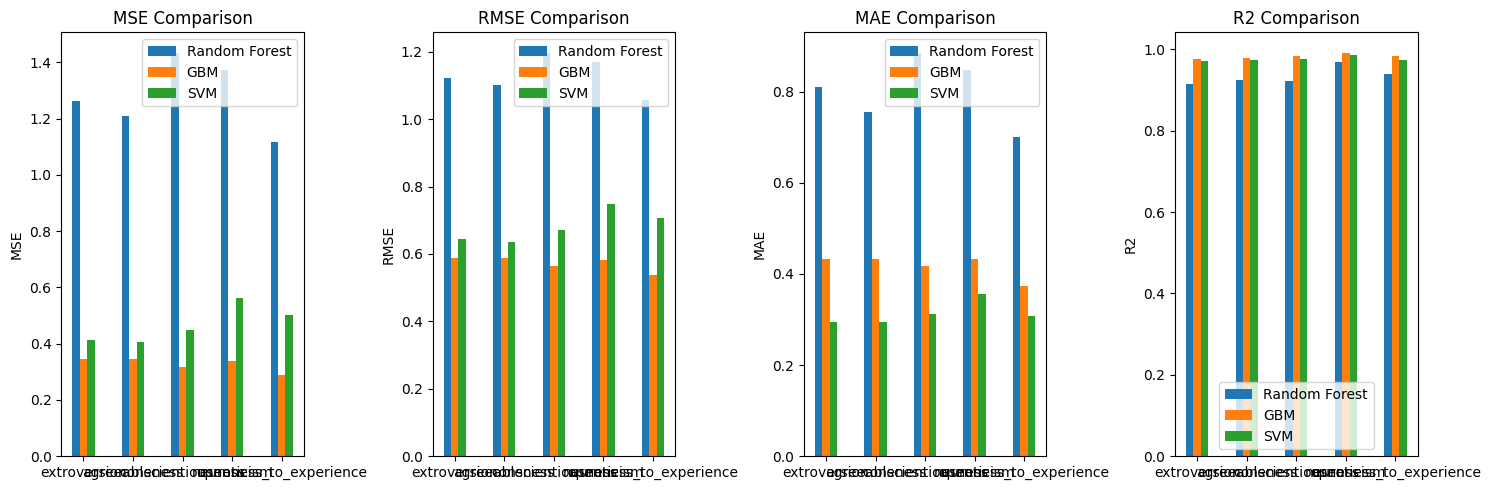

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Split the data into features and objective variables
X = df.iloc[:, :50]
y = df.iloc[:, -5:]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'GBM': GradientBoostingRegressor(random_state=42),
    'SVM': SVR()
}

# Metrics to be evaluated
metrics = {
    'MSE': mean_squared_error,
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'MAE': mean_absolute_error,
    'R2': r2_score
}

# Evaluate models and store results
results = {metric: {model: [] for model in models} for metric in metrics}

for model_name, model in models.items():
    for target in y.columns:
        model.fit(X_train, y_train[target])
        y_pred = model.predict(X_test)
        for metric_name, metric in metrics.items():
            score = metric(y_test[target], y_pred)
            results[metric_name][model_name].append(score)

# Function to plot the values on the bars
def add_values_to_bars(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Plotting results with values on bars
num_metrics = len(metrics)
fig, axes = plt.subplots(num_metrics, 1, figsize=(10, (num_metrics + 1) * 6))  # One additional graph for averages

bar_width = 0.2  # Width of the bars
bar_positions = np.arange(len(y.columns))  # Base positions for bars
average_scores = {metric: {model: 0 for model in models} for metric in metrics}  # To store average scores

for i, (metric_name, model_scores) in enumerate(results.items()):
    ax = axes[i]
    for j, (model_name, scores) in enumerate(model_scores.items()):
        positions = bar_positions + j * bar_width
        bars = ax.bar(positions, scores, width=bar_width, label=model_name)
        add_values_to_bars(ax, bars)
        average_scores[metric_name][model_name] = np.mean(scores)

    ax.set_xticks(bar_positions + bar_width / 2)
    ax.set_xticklabels(y.columns)
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} Comparison')
    ax.legend()


plt.tight_layout()
plt.show()


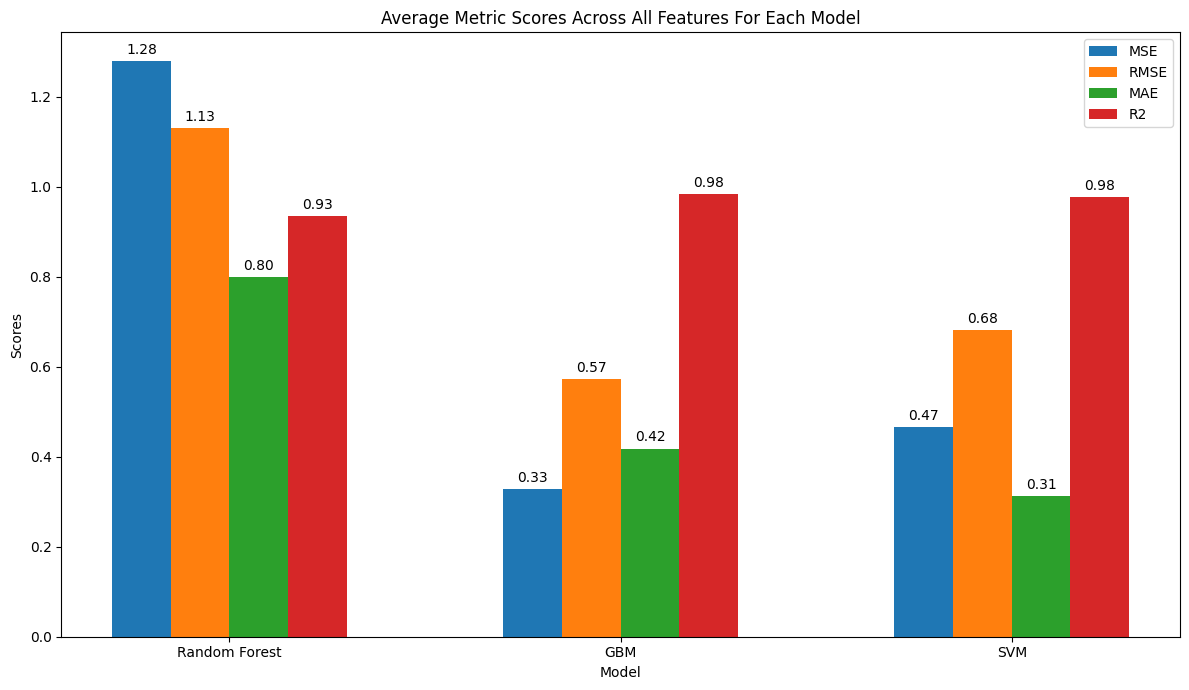

In [ ]:

# Set up the plotting configuration
metrics = list(average_scores.keys())
models = list(average_scores[metrics[0]].keys())
n_metrics = len(metrics)
n_models = len(models)

# Set the width of the bars
bar_width = 0.15

# Set up the figure and the axes
fig, ax = plt.subplots(figsize=(12, 7))

# Calculate the bar positions
index = np.arange(n_models)
bar_positions = np.arange(n_models)

# Plot each metric's average score for each model as a separate bar
for i, metric in enumerate(metrics):
    scores = [average_scores[metric][model] for model in models]
    bars = ax.bar(index + i * bar_width, scores, bar_width, label=metric)

    # Add the values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels, title, and legend
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Average Metric Scores Across All Features For Each Model')
ax.set_xticks(index + bar_width / 2 * (n_metrics - 1))
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
